In [30]:
import fastf1 as f1
import fastf1.plotting as f1plt
from matplotlib import pyplot as plt

In [31]:
f1.set_log_level("Warning")
session = f1.get_session(2023, 'Texas', 'Q')

session.load()

<Figure size 200x1500 with 0 Axes>

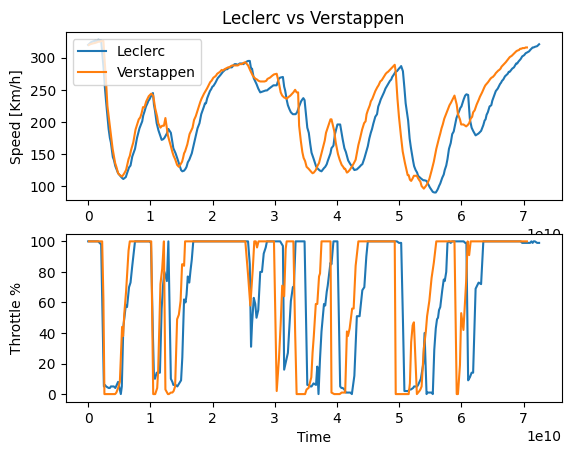

In [46]:
plt.figure(figsize=(2, 15))

fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
max = session.laps.pick_driver('VER').pick_fastest()

lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']
lThrottle = lec_car_data['Throttle']

max_car_data = max.get_car_data()
tm = max_car_data['Time']
mCar = max_car_data['Speed']
mThrorrle = max_car_data['Throttle']

# The rest is just plotting
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t, vCar, label='Leclerc')
ax1.plot(tm, mCar, label='Verstappen')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Leclerc vs Verstappen')
ax1.legend()

ax2.plot(t, lThrottle, label='Leclerc')
ax2.plot(tm, mThrorrle, label='Verstappen')
ax2.set_xlabel('Time')
ax2.set_ylabel('Throttle %')


plt.show()

In [36]:
print(plt.figure())

Figure(640x480)


<Figure size 640x480 with 0 Axes>